<a href="https://colab.research.google.com/github/Ssdosaofc/ML-model-from-scratch/blob/main/ImageLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
train = pd.read_csv("/content/drive/MyDrive/ML/Classification_train.csv")
test = pd.read_csv("/content/drive/MyDrive/ML/Classification_test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(30000, 785)

In [5]:
train.shape

(30000, 785)

In [6]:
test.head()

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,15795,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11964,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model 2(Working)

In [7]:
x_total= train.iloc[:, range(1,785)].values
y_total=train.iloc[:, 0].values

In [8]:
x_total

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
y_total

array([0, 8, 1, ..., 9, 3, 9])

In [10]:
x_total.shape

(30000, 784)

In [11]:
y_total.shape

(30000,)

In [12]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(y_total == i), "times")

digit 0 appear 2979 times
digit 1 appear 3002 times
digit 2 appear 2928 times
digit 3 appear 2993 times
digit 4 appear 3118 times
digit 5 appear 3018 times
digit 6 appear 3094 times
digit 7 appear 2942 times
digit 8 appear 2936 times
digit 9 appear 2990 times


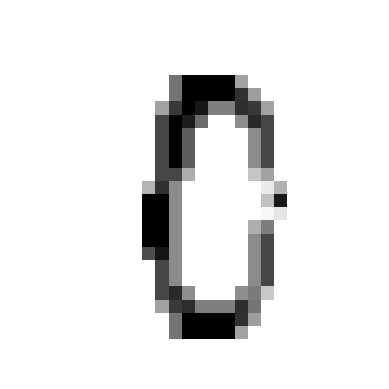

In [13]:
def plot_digit(number):

    pixels = number.reshape(28,28)

    plt.imshow(pixels, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()

plot_digit(x_total[59])


In [14]:
y_total[59]

0

In [15]:
D0=train.copy();D1=train.copy();D2=train.copy();D3=train.copy();D4=train.copy();D5=train.copy();D6=train.copy();D7=train.copy();D8=train.copy();D9=train.copy();


In [16]:
datasets = [D0,D1,D2,D3,D4,D5,D6,D7,D8,D9]

The required digit turns into 1 rest turns into 0

One-Hot Encoding

In [17]:
for i in range(10):
  datasets[i]['Target'] = (datasets[i]['label'] == i).astype(int)
  datasets[i].drop(columns=['label'], inplace=True)

In [18]:
x_test= test.iloc[:, range(1,785)].values
y_test=test['ID']

In [39]:
def sigmoid(z):

    s = 1.0 / (1.0 + np.exp(-z))

    return s

In [40]:
def cost_and_gradient_function(w, b, X, Y):

    m = X.shape[1]

    z = np.dot(w.T,X)+b
    f = sigmoid(z)
    cost = -1.0/m*np.sum(Y*np.log(f)+(1.0-Y)*np.log(1.0-f))

    dj_dw = 1.0/m*np.dot(X, (f-Y).T)
    dj_db = 1.0/m*np.sum(f-Y)

    assert (dj_dw.shape == w.shape)
    assert (dj_db.dtype == float)

    cost = np.squeeze(cost)
    assert (cost.shape == ())

    return dj_dw,dj_db, cost

In [41]:
def gradient_descent(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    J_history = []

    for i in range(num_iterations):

        dj_dw,dj_db, cost = cost_and_gradient_function(w, b, X, Y)

        w = w - learning_rate*dj_dw
        b = b - learning_rate*dj_db

        if i % 100 == 0:
            J_history.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost (iteration %i) = %f" %(i, cost))

    return w,b, dj_dw,dj_db, J_history

In [45]:
def predict (w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)

    f = sigmoid (np.dot(w.T, X)+b)

    for i in range(f.shape[1]):
        if (f[:,i] > 0.5):
            Y_prediction[:, i] = 1
        elif (f[:,i] <= 0.5):
            Y_prediction[:, i] = 0

    assert (Y_prediction.shape == (1,m))

    return Y_prediction

In [46]:
def model (X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = False):

    w = np.zeros((X_train.shape[0],1))
    b = 0
    w, b, dj_dw,dj_db, J_history = gradient_descent(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    Y_prediction_test = predict (w, b, X_test)
    Y_prediction_train = predict (w, b, X_train)

    train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-Y_train)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(Y_prediction_test-Y_test)*100.0)

    d = {"costs": J_history,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    print ("Accuarcy Test: ",  test_accuracy)
    print ("Accuracy Train: ", train_accuracy)

    return d

In [47]:
TrainTest_datadict={}

for i in range(10):
  x=datasets[i].iloc[:,:784]
  y=datasets[i].iloc[:,-1]
  y=np.array([y])
  TrainTest_datadict['D'+str(i)]=[x,y]

For dataset 0
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.180865
Cost (iteration 200) = 0.137785
Cost (iteration 300) = 0.118199
Cost (iteration 400) = 0.106366
Cost (iteration 500) = 0.098171
Cost (iteration 600) = 0.092026
Cost (iteration 700) = 0.087178
Cost (iteration 800) = 0.083215
Cost (iteration 900) = 0.079891
Cost (iteration 1000) = 0.077048
Cost (iteration 1100) = 0.074577
Cost (iteration 1200) = 0.072403
Cost (iteration 1300) = 0.070470
Cost (iteration 1400) = 0.068736
Cost (iteration 1500) = 0.067169
Cost (iteration 1600) = 0.065743
Cost (iteration 1700) = 0.064439
Cost (iteration 1800) = 0.063240
Cost (iteration 1900) = 0.062132
Cost (iteration 2000) = 0.061105
Cost (iteration 2100) = 0.060149
Cost (iteration 2200) = 0.059257
Cost (iteration 2300) = 0.058421
Cost (iteration 2400) = 0.057636
Cost (iteration 2500) = 0.056897
Cost (iteration 2600) = 0.056199
Cost (iteration 2700) = 0.055540
Cost (iteration 2800) = 0.054915
Cost (iteration 2900) = 0.054321
Cost (it

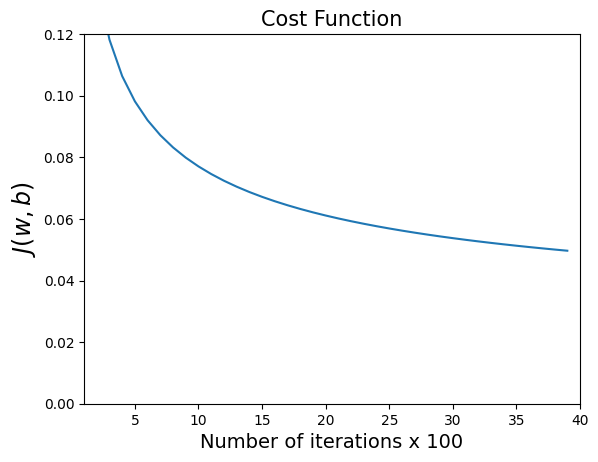

For dataset 1
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.149472
Cost (iteration 200) = 0.106088
Cost (iteration 300) = 0.086962
Cost (iteration 400) = 0.075807
Cost (iteration 500) = 0.068336
Cost (iteration 600) = 0.062909
Cost (iteration 700) = 0.058747
Cost (iteration 800) = 0.055432
Cost (iteration 900) = 0.052713
Cost (iteration 1000) = 0.050434
Cost (iteration 1100) = 0.048488
Cost (iteration 1200) = 0.046803
Cost (iteration 1300) = 0.045324
Cost (iteration 1400) = 0.044014
Cost (iteration 1500) = 0.042843
Cost (iteration 1600) = 0.041788
Cost (iteration 1700) = 0.040830
Cost (iteration 1800) = 0.039956
Cost (iteration 1900) = 0.039154
Cost (iteration 2000) = 0.038415
Cost (iteration 2100) = 0.037730
Cost (iteration 2200) = 0.037094
Cost (iteration 2300) = 0.036501
Cost (iteration 2400) = 0.035945
Cost (iteration 2500) = 0.035424
Cost (iteration 2600) = 0.034933
Cost (iteration 2700) = 0.034471
Cost (iteration 2800) = 0.034033
Cost (iteration 2900) = 0.033618
Cost (it

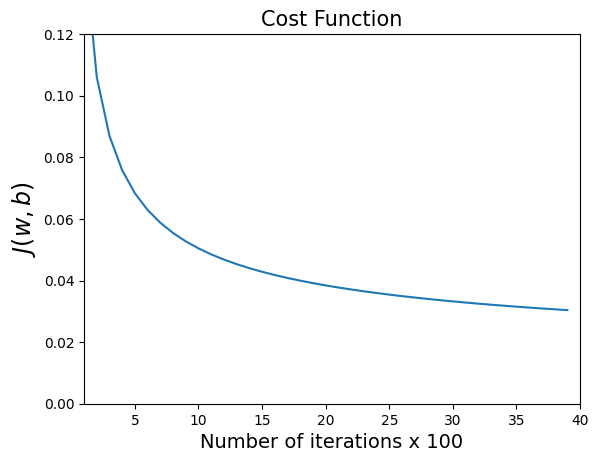

For dataset 2
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.111748
Cost (iteration 200) = 0.074884
Cost (iteration 300) = 0.059405
Cost (iteration 400) = 0.050509
Cost (iteration 500) = 0.044604
Cost (iteration 600) = 0.040344
Cost (iteration 700) = 0.037097
Cost (iteration 800) = 0.034524
Cost (iteration 900) = 0.032424
Cost (iteration 1000) = 0.030670
Cost (iteration 1100) = 0.029179
Cost (iteration 1200) = 0.027892
Cost (iteration 1300) = 0.026767
Cost (iteration 1400) = 0.025774
Cost (iteration 1500) = 0.024888
Cost (iteration 1600) = 0.024091
Cost (iteration 1700) = 0.023371
Cost (iteration 1800) = 0.022715
Cost (iteration 1900) = 0.022115
Cost (iteration 2000) = 0.021563
Cost (iteration 2100) = 0.021052
Cost (iteration 2200) = 0.020579
Cost (iteration 2300) = 0.020139
Cost (iteration 2400) = 0.019728
Cost (iteration 2500) = 0.019343
Cost (iteration 2600) = 0.018981
Cost (iteration 2700) = 0.018641
Cost (iteration 2800) = 0.018320
Cost (iteration 2900) = 0.018016
Cost (it

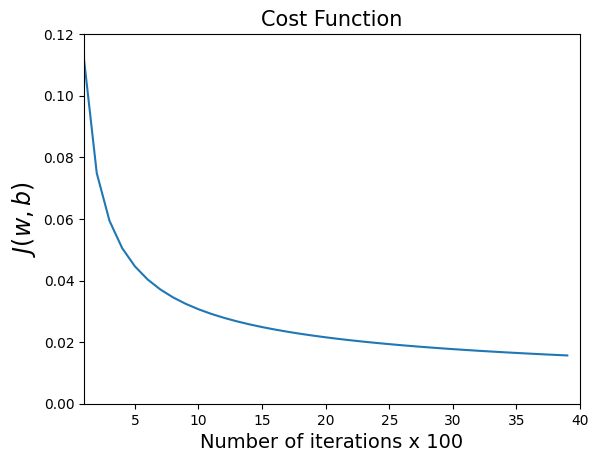

For dataset 3
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.191014
Cost (iteration 200) = 0.148426
Cost (iteration 300) = 0.128294
Cost (iteration 400) = 0.116397
Cost (iteration 500) = 0.108431
Cost (iteration 600) = 0.102658
Cost (iteration 700) = 0.098242
Cost (iteration 800) = 0.094730
Cost (iteration 900) = 0.091852
Cost (iteration 1000) = 0.089439
Cost (iteration 1100) = 0.087378
Cost (iteration 1200) = 0.085592
Cost (iteration 1300) = 0.084023
Cost (iteration 1400) = 0.082631
Cost (iteration 1500) = 0.081385
Cost (iteration 1600) = 0.080260
Cost (iteration 1700) = 0.079238
Cost (iteration 1800) = 0.078304
Cost (iteration 1900) = 0.077446
Cost (iteration 2000) = 0.076654
Cost (iteration 2100) = 0.075919
Cost (iteration 2200) = 0.075236
Cost (iteration 2300) = 0.074597
Cost (iteration 2400) = 0.073999
Cost (iteration 2500) = 0.073437
Cost (iteration 2600) = 0.072907
Cost (iteration 2700) = 0.072407
Cost (iteration 2800) = 0.071933
Cost (iteration 2900) = 0.071484
Cost (it

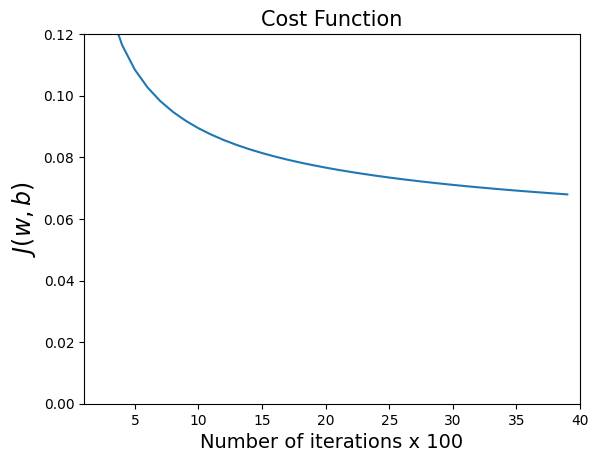

For dataset 4
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.163495
Cost (iteration 200) = 0.116628
Cost (iteration 300) = 0.096220
Cost (iteration 400) = 0.084603
Cost (iteration 500) = 0.076969
Cost (iteration 600) = 0.071492
Cost (iteration 700) = 0.067326
Cost (iteration 800) = 0.064023
Cost (iteration 900) = 0.061322
Cost (iteration 1000) = 0.059059
Cost (iteration 1100) = 0.057127
Cost (iteration 1200) = 0.055453
Cost (iteration 1300) = 0.053982
Cost (iteration 1400) = 0.052678
Cost (iteration 1500) = 0.051509
Cost (iteration 1600) = 0.050455
Cost (iteration 1700) = 0.049497
Cost (iteration 1800) = 0.048622
Cost (iteration 1900) = 0.047817
Cost (iteration 2000) = 0.047075
Cost (iteration 2100) = 0.046387
Cost (iteration 2200) = 0.045747
Cost (iteration 2300) = 0.045149
Cost (iteration 2400) = 0.044589
Cost (iteration 2500) = 0.044064
Cost (iteration 2600) = 0.043569
Cost (iteration 2700) = 0.043102
Cost (iteration 2800) = 0.042660
Cost (iteration 2900) = 0.042241
Cost (it

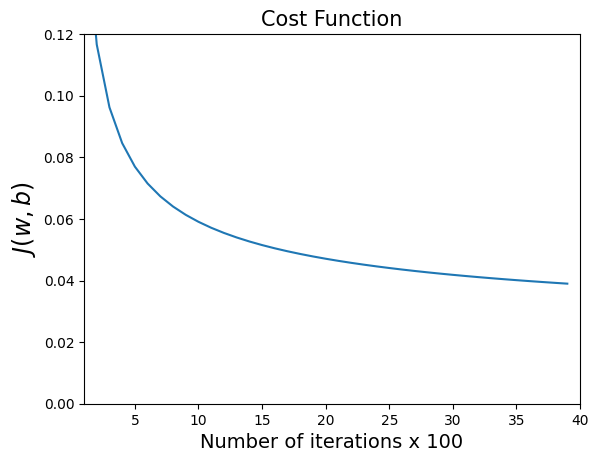

For dataset 5
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.211953
Cost (iteration 200) = 0.158431
Cost (iteration 300) = 0.132798
Cost (iteration 400) = 0.117472
Cost (iteration 500) = 0.107098
Cost (iteration 600) = 0.099509
Cost (iteration 700) = 0.093656
Cost (iteration 800) = 0.088967
Cost (iteration 900) = 0.085099
Cost (iteration 1000) = 0.081837
Cost (iteration 1100) = 0.079037
Cost (iteration 1200) = 0.076596
Cost (iteration 1300) = 0.074442
Cost (iteration 1400) = 0.072523
Cost (iteration 1500) = 0.070797
Cost (iteration 1600) = 0.069232
Cost (iteration 1700) = 0.067805
Cost (iteration 1800) = 0.066495
Cost (iteration 1900) = 0.065287
Cost (iteration 2000) = 0.064167
Cost (iteration 2100) = 0.063125
Cost (iteration 2200) = 0.062151
Cost (iteration 2300) = 0.061239
Cost (iteration 2400) = 0.060381
Cost (iteration 2500) = 0.059571
Cost (iteration 2600) = 0.058807
Cost (iteration 2700) = 0.058082
Cost (iteration 2800) = 0.057394
Cost (iteration 2900) = 0.056739
Cost (it

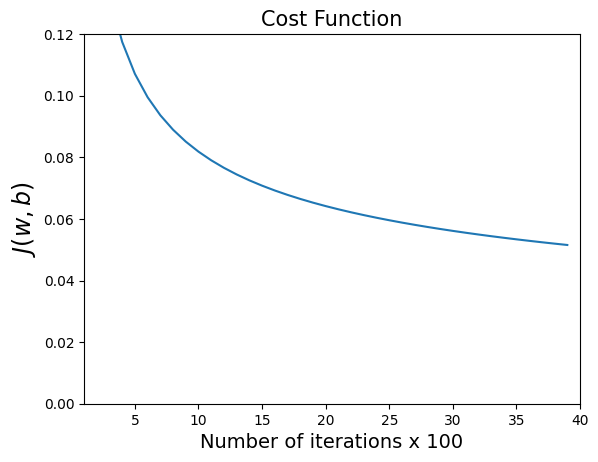

For dataset 6
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.142800
Cost (iteration 200) = 0.111068
Cost (iteration 300) = 0.096600
Cost (iteration 400) = 0.087596
Cost (iteration 500) = 0.081242
Cost (iteration 600) = 0.076446
Cost (iteration 700) = 0.072669
Cost (iteration 800) = 0.069602
Cost (iteration 900) = 0.067053
Cost (iteration 1000) = 0.064896
Cost (iteration 1100) = 0.063041
Cost (iteration 1200) = 0.061426
Cost (iteration 1300) = 0.060004
Cost (iteration 1400) = 0.058740
Cost (iteration 1500) = 0.057608
Cost (iteration 1600) = 0.056586
Cost (iteration 1700) = 0.055657
Cost (iteration 1800) = 0.054809
Cost (iteration 1900) = 0.054031
Cost (iteration 2000) = 0.053313
Cost (iteration 2100) = 0.052648
Cost (iteration 2200) = 0.052029
Cost (iteration 2300) = 0.051453
Cost (iteration 2400) = 0.050913
Cost (iteration 2500) = 0.050407
Cost (iteration 2600) = 0.049931
Cost (iteration 2700) = 0.049481
Cost (iteration 2800) = 0.049057
Cost (iteration 2900) = 0.048654
Cost (it

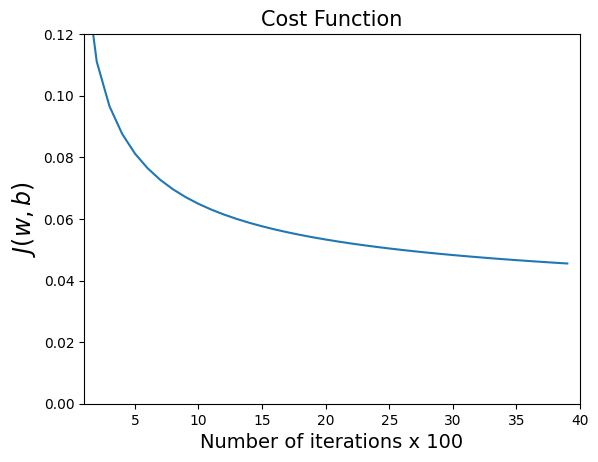

For dataset 7
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.182014
Cost (iteration 200) = 0.150269
Cost (iteration 300) = 0.134732
Cost (iteration 400) = 0.124894
Cost (iteration 500) = 0.117898
Cost (iteration 600) = 0.112581
Cost (iteration 700) = 0.108359
Cost (iteration 800) = 0.104899
Cost (iteration 900) = 0.101994
Cost (iteration 1000) = 0.099509
Cost (iteration 1100) = 0.097351
Cost (iteration 1200) = 0.095453
Cost (iteration 1300) = 0.093766
Cost (iteration 1400) = 0.092253
Cost (iteration 1500) = 0.090886
Cost (iteration 1600) = 0.089641
Cost (iteration 1700) = 0.088502
Cost (iteration 1800) = 0.087455
Cost (iteration 1900) = 0.086487
Cost (iteration 2000) = 0.085588
Cost (iteration 2100) = 0.084751
Cost (iteration 2200) = 0.083969
Cost (iteration 2300) = 0.083235
Cost (iteration 2400) = 0.082546
Cost (iteration 2500) = 0.081896
Cost (iteration 2600) = 0.081282
Cost (iteration 2700) = 0.080701
Cost (iteration 2800) = 0.080150
Cost (iteration 2900) = 0.079626
Cost (it

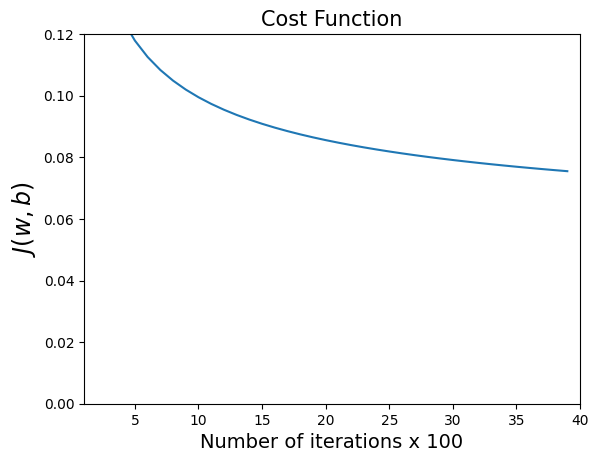

For dataset 8
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.139012
Cost (iteration 200) = 0.099996
Cost (iteration 300) = 0.083035
Cost (iteration 400) = 0.072991
Cost (iteration 500) = 0.066138
Cost (iteration 600) = 0.061071
Cost (iteration 700) = 0.057125
Cost (iteration 800) = 0.053941
Cost (iteration 900) = 0.051301
Cost (iteration 1000) = 0.049067
Cost (iteration 1100) = 0.047144
Cost (iteration 1200) = 0.045468
Cost (iteration 1300) = 0.043989
Cost (iteration 1400) = 0.042672
Cost (iteration 1500) = 0.041490
Cost (iteration 1600) = 0.040420
Cost (iteration 1700) = 0.039448
Cost (iteration 1800) = 0.038558
Cost (iteration 1900) = 0.037740
Cost (iteration 2000) = 0.036984
Cost (iteration 2100) = 0.036283
Cost (iteration 2200) = 0.035631
Cost (iteration 2300) = 0.035023
Cost (iteration 2400) = 0.034453
Cost (iteration 2500) = 0.033918
Cost (iteration 2600) = 0.033414
Cost (iteration 2700) = 0.032939
Cost (iteration 2800) = 0.032490
Cost (iteration 2900) = 0.032064
Cost (it

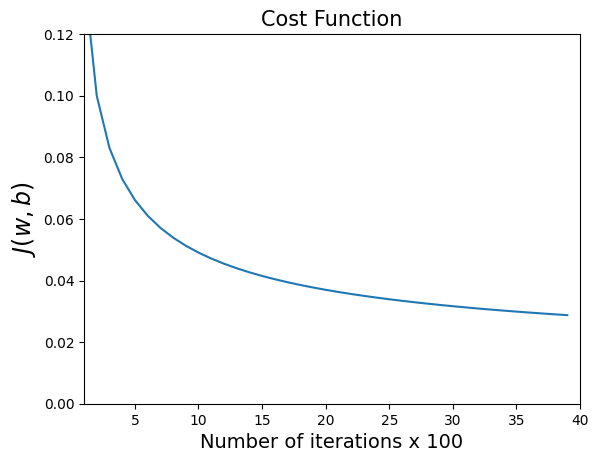

For dataset 9
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.140003
Cost (iteration 200) = 0.099076
Cost (iteration 300) = 0.081480
Cost (iteration 400) = 0.071306
Cost (iteration 500) = 0.064516
Cost (iteration 600) = 0.059590
Cost (iteration 700) = 0.055818
Cost (iteration 800) = 0.052814
Cost (iteration 900) = 0.050354
Cost (iteration 1000) = 0.048294
Cost (iteration 1100) = 0.046537
Cost (iteration 1200) = 0.045017
Cost (iteration 1300) = 0.043687
Cost (iteration 1400) = 0.042509
Cost (iteration 1500) = 0.041458
Cost (iteration 1600) = 0.040513
Cost (iteration 1700) = 0.039656
Cost (iteration 1800) = 0.038876
Cost (iteration 1900) = 0.038161
Cost (iteration 2000) = 0.037503
Cost (iteration 2100) = 0.036894
Cost (iteration 2200) = 0.036330
Cost (iteration 2300) = 0.035803
Cost (iteration 2400) = 0.035312
Cost (iteration 2500) = 0.034851
Cost (iteration 2600) = 0.034417
Cost (iteration 2700) = 0.034009
Cost (iteration 2800) = 0.033623
Cost (iteration 2900) = 0.033258
Cost (it

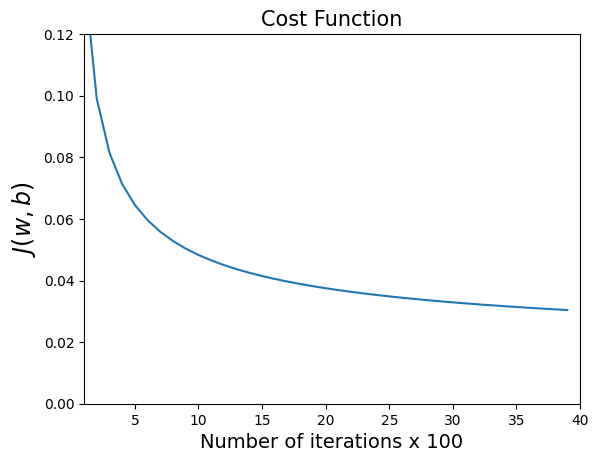

In [48]:
for i in range(10):
  x0=TrainTest_datadict['D'+str(i)][0]
  y0=TrainTest_datadict['D'+str(i)][1]
  y0 = y0.T

  train_proportion = 0.8
  train_test_cut = int(len(x0)*train_proportion)

  X_train, X_test, y_train, y_test = \
      x0[:train_test_cut], \
      x0[train_test_cut:], \
      y0[:train_test_cut], \
      y0[train_test_cut:]

  X_train_normalised = X_train/255.0
  X_test_normalised = X_test/255.0

  X_train_tr = X_train_normalised.transpose()
  y_train_tr = y_train.reshape(1,y_train.shape[0])
  X_test_tr = X_test_normalised.transpose()
  y_test_tr = y_test.reshape(1,y_test.shape[0])

  dim_train = X_train_tr.shape[1]
  dim_test = X_test_tr.shape[1]

  print(f"For dataset {i}")
  d = model (X_train_tr,
            y_train_tr,
            X_test_tr,
            y_test_tr,
            num_iterations = 4000,
            learning_rate = 0.05,
            print_cost = True)

  plt.plot(d["costs"])
  plt.xlim([1,40])
  plt.ylim([0,0.12])
  plt.title("Cost Function",fontsize = 15)
  plt.xlabel("Number of iterations x 100", fontsize = 14)
  plt.ylabel("$J(w,b)$", fontsize = 17)
  plt.show()

# Model 2 Source Code

In [146]:
x1=TrainTest_datadict['D0'][0]
x1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
y1=TrainTest_datadict['D0'][1]
y1 = y1.T
print(y1)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [148]:
train_proportion = 0.8
train_test_cut = int(len(x1)*train_proportion)

X_train, X_test, y_train, y_test = \
    x1[:train_test_cut], \
    x1[train_test_cut:], \
    y1[:train_test_cut], \
    y1[train_test_cut:]

print("Shape of X_train is", X_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of y_test is", y_test.shape)

X_train_normalised = X_train/255.0
X_test_normalised = X_test/255.0

Shape of X_train is (24000, 784)
Shape of X_test is (6000, 784)
Shape of y_train is (24000, 1)
Shape of y_test is (6000, 1)


In [149]:
print(y_test)

[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [150]:
m,n = y_test.shape

In [151]:
X_train_tr = X_train_normalised.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])
X_test_tr = X_test_normalised.transpose()
y_test_tr = y_test.reshape(1,y_test.shape[0])

print(X_train_tr.shape)
print(y_train_tr.shape)
print(X_test_tr.shape)
print(y_test_tr.shape)

dim_train = X_train_tr.shape[1]
dim_test = X_test_tr.shape[1]

print("The training dataset has dimensions equal to", dim_train)
print("The test set has dimensions equal to", dim_test)

(784, 24000)
(1, 24000)
(784, 6000)
(1, 6000)
The training dataset has dimensions equal to 24000
The test set has dimensions equal to 6000


In [152]:
def sigmoid(z):
    """
    Implement the sigmoid function

    Arguments:
    y -- a scalar (float)

    Return:
    s -- the sigmoid function evaluated on z (as in equation (1))
    """
    s = 1.0 / (1.0 + np.exp(-z))

    return s
def initialize(dim):
    """
    Initialise the weights and the bias to tensors of dimensions (dim,1) for w and
    to 1 for b (a scalar)

    Arguments:
    dim -- a scalar (float)

    Return:
    w -- a matrix of dimensions (dim,1) containing all zero
    b -- a scalar = 0
    """
    w = np.zeros((dim,1))
    b = 0

    assert (w.shape == (dim,1))
    assert (isinstance(b, float) or isinstance(b,int))

    return w,b

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1) (our case 784,1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px, number of examples)
    Y -- true "label" vector (containing 0 if class 1, 1 if class 2) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """

    m = X.shape[1]

    z = np.dot(w.T,X)+b
    A = sigmoid(z)
    cost = -1.0/m*np.sum(Y*np.log(A)+(1.0-Y)*np.log(1.0-A))

    dw = 1.0/m*np.dot(X, (A-Y).T)
    db = 1.0/m*np.sum(A-Y)

    assert (dw.shape == w.shape)
    assert (db.dtype == float)

    cost = np.squeeze(cost)
    assert (cost.shape == ())

    grads = {"dw": dw,
             "db":db}

    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (n_x, 1)
    b -- bias, a scalar
    X -- data of shape (n_x, m)
    Y -- true "label" vector (containing 0 if class 1, 1 if class 2), of shape (1, m)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    costs = []

    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate*dw
        b = b - learning_rate*db

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost (iteration %i) = %f" %(i, cost))

    grads = {"dw": dw, "db": db}
    params = {"w": w, "b": b}

    return params, grads, costs

def predict (w, b, X):
    '''
    Predict whether the label is 0 or 1

    Arguments:
    w -- weights, a numpy array of size (n_x, 1)
    b -- bias, a scalar
    X -- data of size (n_x, m)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1)
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)

    A = sigmoid (np.dot(w.T, X)+b)

    for i in range(A.shape[1]):
        if (A[:,i] > 0.5):
            Y_prediction[:, i] = 1
        elif (A[:,i] <= 0.5):
            Y_prediction[:, i] = 0

    assert (Y_prediction.shape == (1,m))

    return Y_prediction


def model (X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = False):

    w, b = initialize(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict (w, b, X_test)
    Y_prediction_train = predict (w, b, X_train)

    train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-Y_train)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(Y_prediction_test-Y_test)*100.0)

    d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    print ("Accuarcy Test: ",  test_accuracy)
    print ("Accuracy Train: ", train_accuracy)

    return d

In [153]:
d = model (X_train_tr,
           y_train_tr,
           X_test_tr,
           y_test_tr,
           num_iterations = 4000,
           learning_rate = 0.05,
           print_cost = True)

Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.180865
Cost (iteration 200) = 0.137785
Cost (iteration 300) = 0.118199


KeyboardInterrupt: 

# Failed Model 1

10 datasets for 10 digits

In [ ]:
D0=train.copy();D1=train.copy();D2=train.copy();D3=train.copy();D4=train.copy();D5=train.copy();D6=train.copy();D7=train.copy();D8=train.copy();D9=train.copy();


In [ ]:
datasets = [D0,D1,D2,D3,D4,D5,D6,D7,D8,D9]

The required digit turns into 1 rest turns into 0

One-Hot Encoding

In [ ]:
for i in range(10):
  datasets[i]['Target'] = (datasets[i]['label'] == i).astype(int)
  datasets[i].drop(columns=['label'], inplace=True)

In [ ]:
datasets[7].head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
TrainTest_datadict={}

for i in range(10):
  x=datasets[i].iloc[:,:784]
  x=x.T
  x=x/255.0
  y=datasets[i].iloc[:,-1]
  y=np.array([y])
  TrainTest_datadict['D'+str(i)]=[x,y]

In [ ]:
iterations = 100000
alpha = 0.1
m=30000

In [ ]:
def normalize_features(x):
    mean = np.mean(x, axis=0)
    std_dev = np.std(x, axis=0)
    normalized_x = (x - mean) / std_dev
    return normalized_x, mean, std_dev

In [ ]:
def sigmoid(z):

    g = 1/ (1 + np.exp(-z))

    return g

In [ ]:
def cost_function(x, y, w, b,costfunc_values,k):

    z = np.dot(w,x) + b
    f = sigmoid(z)

    total_cost =  1/m*(-1*(np.sum(y*np.log(f) + (1-y)*np.log(1-f))))
    costfunc_values.append(total_cost)

    k+=1

    return total_cost,costfunc_values,k

In [ ]:
def cross_entropy(x, y, w, b, costfunc_values, k, epsilon=1e-8):
    z = np.dot(w, x) + b
    f = sigmoid(z)

    f = np.clip(f, epsilon, 1 - epsilon)

    total_cost = 1/m * (-1*(np.sum(y * np.log(f) + (1 - y) * np.log(1 - f))))
    costfunc_values.append(total_cost)

    k += 1

    return total_cost, costfunc_values, k


https://community.deeplearning.ai/t/logistic-loss-function-divide-by-zero-encountered-in-log/192184/4

In [ ]:
def gradient_function(x, y, w, b):

    z = np.dot(w,x) + b
    f = sigmoid(z)
    dif = f - y
    dj_dw = np.dot(dif,x.T) / m
    dj_db = np.sum(dif) / m
    return dj_dw, dj_db

In [ ]:
def gradient_descent(X, y, w_in, b_in, alpha):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        return w_in, b_in

In [ ]:
x1=TrainTest_datadict['D0'][0]
x1 =x1/255.0
x1.head()


,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
pixel0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cost_value=[]
trained_parameters=[]

In [ ]:
for sets in range(10):
  x=TrainTest_datadict['D'+str(sets)][0]
  y=TrainTest_datadict['D'+str(sets)][1]
  w=np.random.randn(1,784)
  b=0.0
  costfunc_values = []
  k = 0

  print(f"For dataset {sets}")

  cost,costfunc_values,k = cost_function(x, y, w, b,costfunc_values,k)
  dw,db= gradient_function(x, y, w, b)
  w,b=gradient_descent(x, y, w, b, alpha)

  if i%2000 == 0:
      print('running @ ',cost)
      if i%2 == 0:
        if abs(cost-costfunc_values[-2])<0.000001:
          if abs(cost-costfunc_values[-3])<0.000001:
            break

  cost_value.append(costfunc_values)
  trained_parameters.append([w,b])
  print(f"{k} Iterations")

For dataset 0
1 Iterations
For dataset 1
1 Iterations
For dataset 2
1 Iterations
For dataset 3
1 Iterations
For dataset 4
1 Iterations
For dataset 5
1 Iterations
For dataset 6
1 Iterations
For dataset 7


<ipython-input-11-70652a5c111a>:6: RuntimeWarning: divide by zero encountered in log
  total_cost =  1/m*(-1*(np.sum(y*np.log(f) + (1-y)*np.log(1-f))))


1 Iterations
For dataset 8
1 Iterations
For dataset 9
1 Iterations


# Source Code Model 1

In [ ]:
!pip install gdown
!gdown --id 1xIYCrCOo3cPIgslEzI11_cQ_2QFROTHv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xIYCrCOo3cPIgslEzI11_cQ_2QFROTHv
To: /content/data.csv
100% 20.4M/20.4M [00:00<00:00, 66.7MB/s]


In [ ]:
data = pd.read_csv('/content/data.csv',header=None)

In [ ]:
D0 = data.copy();D1 = data.copy();D2 = data.copy();D3 = data.copy();D4 = data.copy();D5 =data.copy();D6 = data.copy();D7 = data.copy();D8 = data.copy();D9 = data.copy()



datasets = [D0,D1,D2,D3,D4,D5,D6,D7,D8,D9]

In [ ]:
 for i in range(10):
  for j in range(5000):
    if datasets[i].at[j,400] == i:
      datasets[i].at[j,400] = 1
    else:
      datasets[i].at[j,400] = 0

In [ ]:
#TrainTest_datadict['key'][0] ==> X && TrainTest_datadict['key'][1] ==> y
TrainTest_datadict = {}
 #399 --> X 400 --> y
for i in range(10):
  X = datasets[i].iloc[:,:400]
  X = X.T
  y = datasets[i].iloc[:,-1]
  y = np.array([y])
  TrainTest_datadict['D'+str(i)] = [X,y]

In [ ]:
itterations = 10000000   #random big value
alpha = 0.160
m = 5000
cost_values = []
trained_parameters = []

for trainsets in range(10):
  X = TrainTest_datadict['D'+str(trainsets)][0]
  y = TrainTest_datadict['D'+str(trainsets)][1]
  weights = np.random.randn(1,400)
  bias = 0
  costfunc_values = []
  k = 0
  print('Training for dataset '+str(trainsets))
  for i in range(1,itterations+1):
    #logistic function
    z = np.dot(weights,X) + bias
    hypothesis = 1/(1 + np.exp(-z))

    #cost function
    j = 1/m*(-1*(np.sum(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis))))
    costfunc_values.append(j)
    k+=1

    #gradient decent
    dw =  1/m * np.dot(hypothesis-y,X.T)
    db =  1/m * np.sum(hypothesis-y)
    weights = weights - alpha*dw
    bias = bias - alpha*db

    #stop training
    if i%2000 == 0:
      print('running @ ',j)
    if i%2 == 0:
      if abs(j-costfunc_values[-2])<0.000001:
        if abs(j-costfunc_values[-3])<0.000001:
          break
  cost_values.append(costfunc_values)
  trained_parameters.append([weights,bias])
  print('itteration number:',k)

Training for dataset 0
running @  0.043115189985264056
running @  0.03026538588462469
running @  0.02489707244201688
running @  0.021708642724634714
running @  0.019501519526667697
running @  0.017854742480467038
running @  0.01657620308655347
itteration number: 15156
Training for dataset 1
running @  0.03724141282643543
running @  0.033072007789028066
running @  0.030583662538278395
running @  0.028718223563997544
running @  0.027212981024548315
running @  0.0259507069632008
running @  0.024865025356678252
itteration number: 14196
Training for dataset 2
running @  0.09968952743658065
running @  0.08170526914576719
running @  0.0745009396572521
running @  0.07057970412201393
running @  0.06798428593575001
running @  0.06604961160593097
running @  0.06450112613959477
running @  0.06320637846615822


KeyboardInterrupt: 